In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# The challenge : color correction for underwater images

we want to find a filter that can be applied to the image to correct the color cast to make the image look more or less like the target image.
To do this, we'll need to:
 - apply some trial and error to find a filter that works, including naively adjusting the color channels,
 - understand what's causing the color cast in the first place.
  - investigate some of the given example corrected images to see if we can find a pattern that will help us to develop a more systematic approach to color correction.

here is an example of an underwater image, and the same image after color correction:

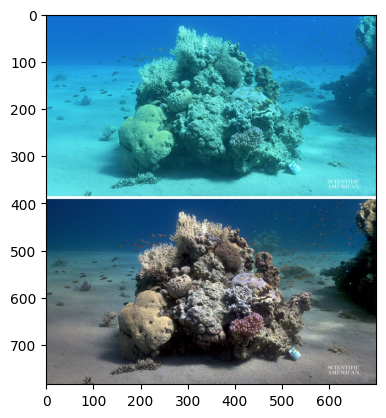

In [39]:
# Load the image
image = cv2.imread('img.png', cv2.IMREAD_UNCHANGED)

# show the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

the task is to edit the upper half of the image to make it look like the lower half. The upper half has a blue color cast, while the lower half looks more like what you'd expect to see underwater.

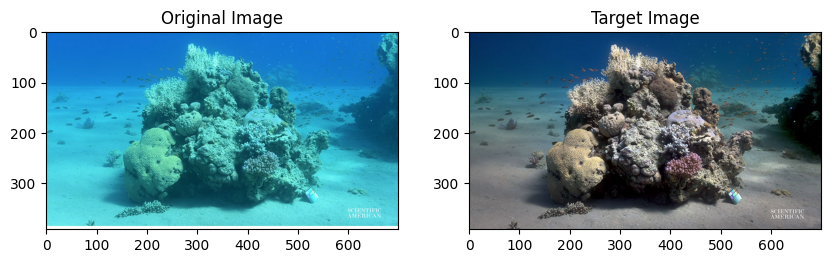

In [112]:
H, W, C = image.shape
original_image =    image[0: H // 2, :, :]
target_image =      image[H // 2: , :, :]

def compare_images(fixed_image, title='filtered image'):
    #show the images
    plt.figure(figsize=(10, 5))

    #show original image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(fixed_image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    #plt.axis('off')

    # show target image
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(target_image, cv2.COLOR_BGR2RGB))
    plt.title('Target Image')

compare_images(original_image, title='Original Image')

# apply some filters to the image, and compare the results
 a basic color correction technique that involves converting the image to a different color space, and then adjusting the color channels to neutralize the color cast.

## 1st attempt: correct the color cast by enhancing the red channel
let's just try a naive approach and see what happens. we'll try to correct the color cast by multiplying the red channel by a constant factor.

In [0]:
# Convert the image to grayscale
def correction_attempt_1(image, red_boost=2):
    my_image = image.copy()

    # enhance red channel
    my_image[:, :, 2] = my_image[:, :, 2] * red_boost # image is in BGR format
    return my_image

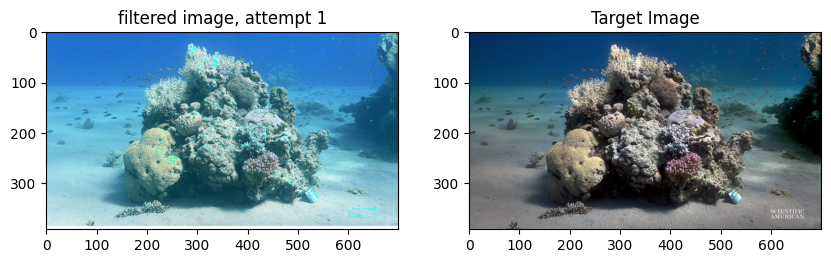

In [113]:
fixed_image = correction_attempt_1(original_image)
compare_images(fixed_image, title='filtered image, attempt 1')

## plot the color channels
we can get a better understanding by plotting the color channels of the image. this might also reveal what happens in the target correction filter.

In [0]:
# plot the color channels
def plot_color_channels(image):
    # convert image to RGB color space
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # plot the color channels
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
    for i, ax in enumerate(axs):
        # extract one channel
        ax.imshow(image*np.array([i==j for j in range(3)]))
        ax.set_title(f'Channel {i}', fontsize=20)
        ax.axis('off')

    plt.show()


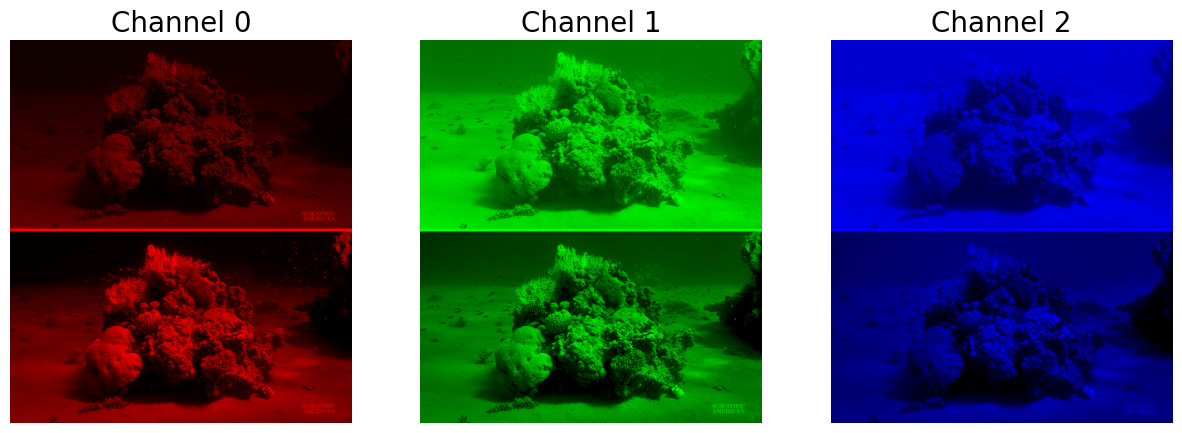

In [49]:
plot_color_channels(image)

# 2nd attempt: correct the color cast by using histogram equalization
what is a histogram equalization? it is a method that improves the contrast in an image, in order to stretch out the intensity range. this is done by redistributing the intensity values of the image. the goal is to obtain a uniform distribution of intensity values. how does it work? let's leaave it for further investigation

- for now, let's equalize the histogram of the red channel and see what happens.

In [0]:
# Convert the image to grayscale
def correction_attempt_2(image):
    my_image = image.copy()
    # enhance red channel
    my_image[:, :, 2] = cv2.equalizeHist(my_image[:, :, 2]) # image is in BGR format
    return my_image

(392, 700, 3)


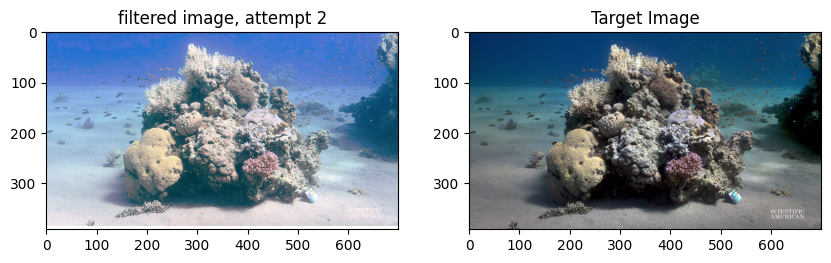

In [115]:

fixed_image = correction_attempt_2(original_image)
compare_images(fixed_image, title='filtered image, attempt 2')


## 3rd attempt: correct the color cast by enhancing all color channels
the equalization of the red channel seems to have improved the image, but it's still not quite right. let's try equalizing all the color channels.

(392, 700, 3)


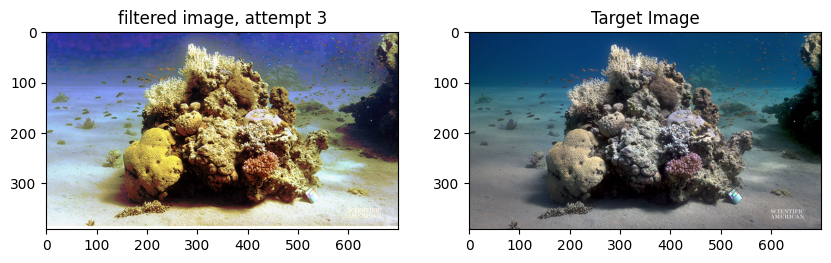

In [116]:
# Convert the image to grayscale
def correction_attempt_3(image):
    my_image = image.copy()
    # enhance red channel
    for i in range(3):
        my_image[:, :, i] = cv2.equalizeHist(my_image[:, :, i]) # image is in BGR format
    return my_image

fixed_image = correction_attempt_3(original_image)
print(fixed_image.shape)
compare_images(fixed_image, title='filtered image, attempt 3')
